In [45]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [83]:
df = pd.read_csv('combined_matches_by_teams.csv')

In [84]:
df.drop(columns=['match_id', 'blue_team_region'], inplace=True)

In [85]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,False
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.6

### Set blue and orange wins to 1 or 0 instead of true and false

In [86]:
df['blue_winner'] = df.blue_winner.astype(int)

In [87]:
df['orange_winner'] = df.orange_winner.astype(int)

In [88]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,1,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,0
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,1,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.63,4893312.

### Split the data

In [89]:
def train_validate_test(df, rs):
    """
    Splits data into 3 segments and stratifies on target
    requires the dataframe and target as args
    """
    train_val, test = train_test_split(df,
                                       train_size=0.82,
                                       random_state=rs)
                                   
    train, validate = train_test_split(train_val,
                                       train_size=0.73,
                                       random_state=rs)
                                     
    return train, validate, test

In [90]:
train, val, test = train_validate_test(df, 706)

In [91]:
train.shape, val.shape, test.shape

((2590, 98), (959, 98), (780, 98))

### Which color wins more?

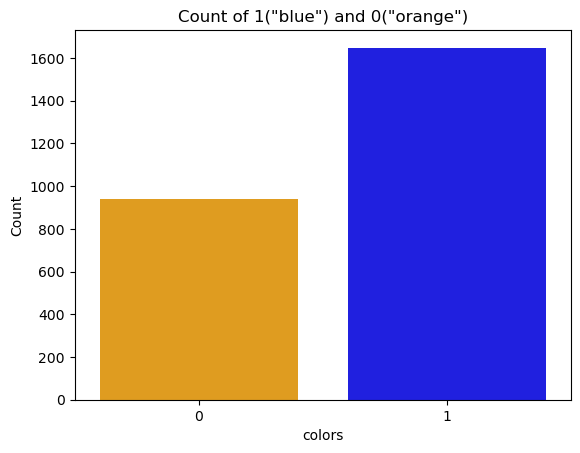

In [41]:
sns.countplot(x='blue_winner', data=train, palette=['orange', 'blue'])

# add axis labels and title
plt.xlabel('colors')
plt.ylabel('Count')
plt.title('Count of 1("blue") and 0("orange")')

# show the plot
plt.show()

In [42]:
train.blue_winner.value_counts(normalize=True)

1    0.636293
0    0.363707
Name: blue_winner, dtype: float64

### H$0$: There is no statistical difference in blue winner and orange winner
### H$a$: There is a statistical difference in blue winner and orange winner

In [55]:
alpha = 0.05

In [43]:
contingency_table = pd.crosstab(train.blue_winner, train.orange_winner)

In [53]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [56]:
if p_value < alpha:
    print('can reject null hypothesis')
else:
    print('faild to reject null hypothesis')

can reject null hypothesis


### do more demos per series lead to more wins? 

In [94]:
train.groupby('blue_team_name').sum()






,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
blue_team_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00 NATION,752.0,170.0,515.0,130.0,106746.0,529.957190,109125.0,111530.64322,12773.10,682270.0,150572.0,459010.0,87223.0,223260.0,63349.0,5517.0,1015.0,19130.0,5388.0,94793.0,14446.0,89120.0,12070.93,9726.33,35481.86,22710.60,17226.42,23169.65,148554302.0,15338.88,40747.40,44422.84,56235.99,37839.25,6433.87,2531.63,24805.0,47368.54,33148.03,19992.55,65277.56,35231.15,73072.11,27436.99,291.0,290.0,51.0,13,806.0,148.0,460.0,112.0,100336.0,409.730572,111018.0,113654.72514,13116.37,695384.0,154217.0,480732.0,90884.0,214652.0,63333.0,5778.0,1082.0,18670.0,5469.0,99602.0,17839.0,91859.0,12072.17,10590.35,34626.58,21529.47,17304.02,25116.88,148970483.0,16070.52,40238.58,44181.16,55775.98,38325.73,6388.63,2304.51,21660.0,47447.60,32747.53,20295.24,65067.13,35423.00,72032.34,28457.97,290.0,291.0,40.0,9
01 ESPORTS,287.0,60.0,150.0,48.0,35036.0,159.710115,46387.0,47298.19886,4800.36,265365.0,57672.0,185800.0,34899.0,79565.0,22773.0,2152.0,397.0,6794.0,1953.0,29161.0,4903.0,36827.0,5156.37,2815.55,14139.36,7702.79,5913.60,7811.32,53376457.0,5746.52,14576.24,16025.68,20124.90,14002.84,2220.64,695.38,6224.0,16549.81,12079.65,7719.02,22930.46,13417.91,26833.